### Heart Disease Prediction

In the below notebook we will be actually predicting the likelihood of someone having a heart disease in the first part of the dataset we will be using logistic regression model to predict the output which in the below column is represented by the column name(TARGET) where 1. represents a Defective Heart  and 0. represents a Healhy heart

In [4]:
# We will start by importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [5]:
# We willl start by loading the dataset
df =pd.read_csv('heart_disease_data.csv')

In [6]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isnull().sum().sum()

0

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data analysis

c:\Users\stilinski\OneDrive\Documents\mlmodel\venv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


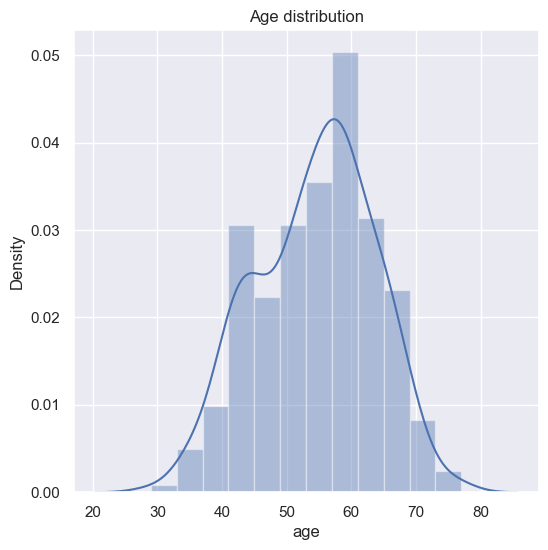

In [11]:
#checking the distibution of the  age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age distribution')
plt.show()

The age distribution is actually in a  normal distribution form

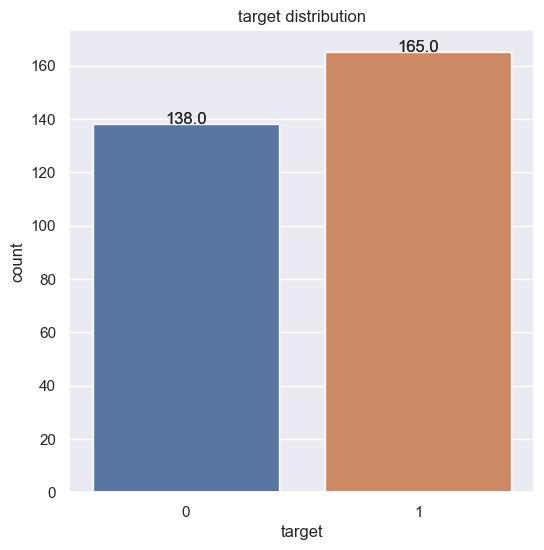

In [12]:
# we will be looking at the distibution of the target variable
plt.figure(figsize =(6,6))
sns.countplot(x='target',data=df)
plt.title('target distribution')
ax = sns.countplot(x='target', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

plt.show()

 As stated above !.Represents the Defective Heart while 0. represents a Healthy Heart

#### We will start by splitting the data 

In [13]:
X = df.drop(columns='target', axis = 1)
Y= df['target']

In [14]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [15]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

The stratify model we have in place is to actually to split the trai test data proportionallyto ensure the model is not overfitting

In [16]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,stratify=Y,random_state =2)

In [17]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


#### Model training

 logistic  regression

In [18]:
model =LogisticRegression()


In [19]:
# Training the logistic model to train the data
model.fit(X_train,Y_train)

c:\Users\stilinski\OneDrive\Documents\mlmodel\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

##### Model Evaluation

Accuracy score

In [20]:
# Accuracy of the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy =accuracy_score(X_train_prediction,Y_train)

In [21]:
print('Accuracy on the Training data ',training_data_accuracy)

Accuracy on the Training data  0.8512396694214877


In [22]:
#Testing the accuracy of the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy =accuracy_score(X_test_prediction,Y_test)

In [23]:
print('Accuracy on the Test data ',test_data_accuracy)

Accuracy on the Test data  0.819672131147541


In [24]:
def precision_recall_f1_score(true_labels,pred_labels):
    precision_value=precision_score(true_labels,pred_labels)
    recall_value=recall_score(true_labels,pred_labels)
    f1_score_value=f1_score(true_labels,pred_labels)
    
    print('Precision =',precision_value)
    print('Recall =',recall_value)
    print('F1_score =',f1_score_value)

In [25]:
precision_recall_f1_score(Y_train,X_train_prediction)

Precision = 0.8287671232876712
Recall = 0.9166666666666666
F1_score = 0.8705035971223022


In [26]:
precision_recall_f1_score(Y_test,X_test_prediction)

Precision = 0.84375
Recall = 0.8181818181818182
F1_score = 0.8307692307692308


So  actually the   above model is agood model since the accuracy of the test and train data is almost equal thus the model
is good and we acn rule out  any cahnces  n of overfitting

#### Building a predictive system

In [27]:
input_data =(57,0,0,140,241,0,1,123,1,0.2,1,0,3)

#Change the data to a numpy array
input_data_array =np.array(input_data)
#reshape the array as we are only predicting for only one instance
input_data_reshaped  =  input_data_array.reshape(1,-1)
prediction =  model.predict(input_data_reshaped)
print (prediction)
if prediction is 0:
    print('The person is healthy')
else:
    print('The person Has a Heart Disease')



[0]
The person Has a Heart Disease


c:\Users\stilinski\OneDrive\Documents\mlmodel\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [28]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Thus generally the model  predicts  whethrt the person has a heart problem or not we just need to input various  X variables and it will predict whetehr the person has a heart  disease or not

In [29]:
# saving the trained model
import pickle

In [30]:
filename ='trained_model.sav'
pickle.dump(model ,open(filename,'wb'))

In [31]:
#loading the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [32]:
input_data =(57,0,0,140,241,0,1,123,1,0.2,1,0,3)

#Change the data to a numpy array
input_data_array =np.array(input_data)
#reshape the array as we are only predicting for only one instance
input_data_reshaped  =  input_data_array.reshape(1,-1)
prediction =  loaded_model.predict(input_data_reshaped)
print (prediction)
if prediction == 0:
    print('The person is healthy')
else:
    print('The person Has a Heart Disease')


[0]
The person is healthy


c:\Users\stilinski\OneDrive\Documents\mlmodel\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import pickle

# ...

# Load the model
with open('trained_model.sav', 'rb') as model_file:
    regmodel = pickle.load(model_file)

# Print model details
print(regmodel)


: 